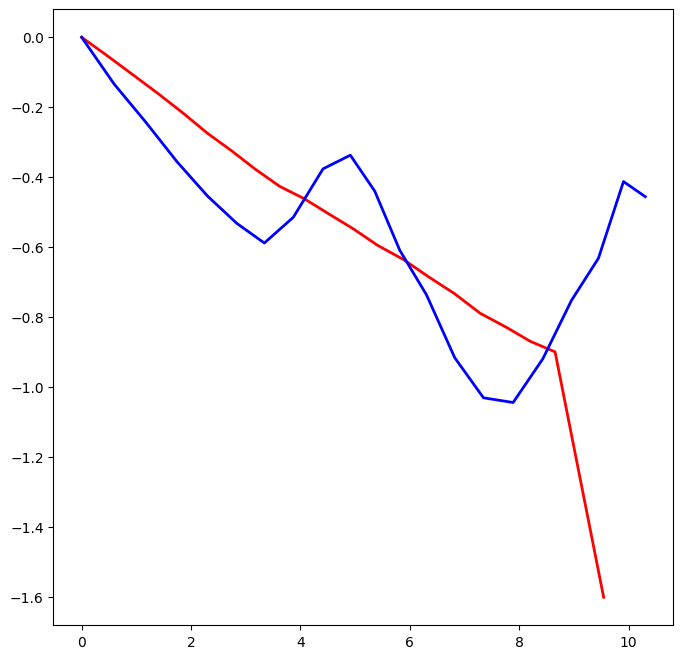

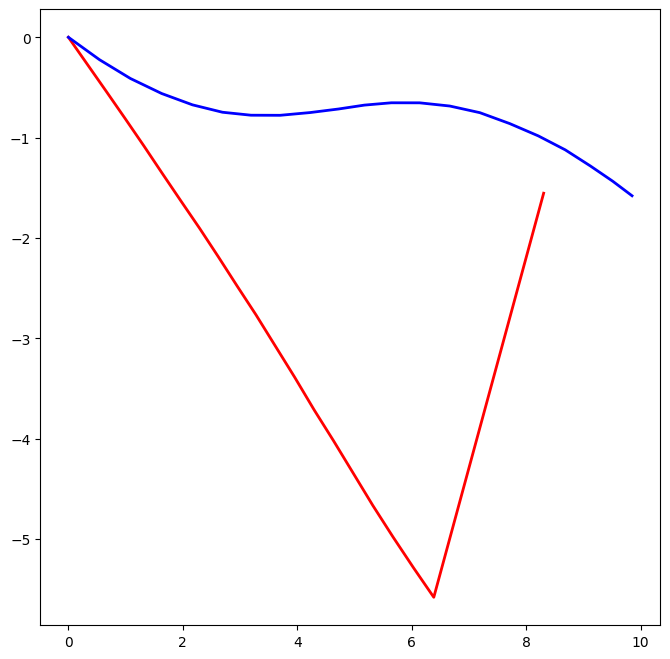

In [69]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def convert_rad2deg(direction_x, direction_y):
    angle_rad = np.arctan2(direction_y, direction_x)
    angle_deg = angle_rad * 180 / np.pi
    return angle_deg

def  synthetic_trajectory(vel, direction_x, direction_y, time):
    vel_x = vel * direction_x
    vel_y = vel * direction_y
    # Calculate the trajectory
    trajectory_x = vel_x * time
    trajectory_y = vel_y * time
    return trajectory_x, trajectory_y

def synthetic_trajectory_1(vel_x,vel_y,time):
    trajectory_x = vel_x * time
    trajectory_y = vel_y * time
    return trajectory_x, trajectory_y

fold_path = os.getcwd() 

model_type = "lstm" # ["lstm","hlstm","arx","trans"]
window_size = 100
time_step = 20
cricket_number = "c17"
input_pattern = "pattern1" # ["pattern1(All)","pattern2(ThC+2FTi hind leg)","pattern3(THC)"]

# get the directon data from the csv file
direction_path = fold_path + "/Evaluation/Results/"+ model_type+"_"+str(window_size)+"_"+str(time_step)+"_"+cricket_number+"_Direction_"+input_pattern+".csv"
direction = pd.read_csv(direction_path, usecols=[1,2,3,4])
direction = np.array(direction)
pred_direction_x, pred_direction_y = direction[:,0], direction[:,1]
label_direction_x, label_direction_y = direction[:,2], direction[:,3]

# get the velocity data from the csv file
velocity_path = fold_path + "/Evaluation/Results/"+ model_type+"_"+str(window_size)+"_"+str(time_step)+"_"+cricket_number+"_Vel_"+input_pattern+".csv"
velocity = pd.read_csv(velocity_path, usecols=[1,2,3,4,5,6])
velocity = np.array(velocity)
pred_vel, pred_vel_x, pred_vel_y = velocity[:,0], velocity[:,1], velocity[:,2]
label_vel, label_vel_x, label_vel_y = velocity[:,3], velocity[:,4], velocity[:,5]

# synthetic trajectory
end = len(label_direction_x) * 1/119.88
t_test = np.arange(0, end, 1/119.88) 
pred_trajectory_x, pred_trajectory_y = synthetic_trajectory(pred_vel, pred_direction_x, pred_direction_y, t_test)
label_trajectory_x, label_trajectory_y = synthetic_trajectory(label_vel, label_direction_x, label_direction_y, t_test)

pred_trajectory_x_1, pred_trajectory_y_1 = synthetic_trajectory_1(pred_vel_x, pred_vel_y, t_test)
label_trajectory_x_1, label_trajectory_y_1 = synthetic_trajectory_1(label_vel_x, label_vel_y, t_test)


plt.figure(figsize=(8, 8))
plt.plot(pred_trajectory_x[:time_step+1],pred_trajectory_y[:time_step+1],label='Prediction',c='red',linewidth=2)
plt.plot(label_trajectory_x[:time_step+1],label_trajectory_y[:time_step+1],label='Original data',c='blue',linewidth=2)

plt.figure(figsize=(8, 8))
plt.plot(pred_trajectory_x_1[:time_step+1],pred_trajectory_y_1[:time_step+1],label='Prediction',c='red',linewidth=2)
plt.plot(label_trajectory_x_1[:time_step+1],label_trajectory_y_1[:time_step+1],label='Original data',c='blue',linewidth=2)


In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

a = np.sin(30*np.pi/180)
a1 = np.arcsin(a)*180/np.pi
a2 = np.sin(a1*np.pi/180)
a2

0.49999999999999994